<a href="https://colab.research.google.com/github/bala-baskar/deep_learning_path/blob/main/courses/IITM_CS7015_Deep%20learning/NN_backpropagation_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(42)
x1 = np.random.random(100)
x2 = np.random.random(100)
x3 = np.random.random(100)

X = np.array([x1,x2,x3]).T
X.shape

(100, 3)

In [3]:
fn = lambda x1,x2,x3: np.abs(2*x1 + 5*x2 -3*x3)

In [4]:
y = fn(x1,x2,x3)
y

array([1.01986877, 4.83106077, 2.55088165, 1.04450786, 3.03058247,
       1.53085903, 1.86366721, 3.51960268, 2.3310361 , 1.31862055,
       0.15627511, 0.67024055, 4.35748976, 3.79247219, 1.39413105,
       4.01236471, 3.65064578, 0.25711106, 3.37778633, 0.73149926,
       3.28806789, 3.05451841, 1.89328237, 0.1798359 , 1.25620868,
       2.97392194, 1.57038973, 4.15282862, 1.45654988, 0.75322146,
       0.91771081, 0.05632398, 1.00128163, 2.10829385, 6.06008362,
       1.06545301, 2.36086356, 3.63749112, 1.25019718, 5.20788336,
       2.23493719, 0.61252043, 0.1895736 , 2.21255625, 1.89539259,
       1.27547638, 2.38669138, 0.6535667 , 1.54004562, 0.79608713,
       5.59715201, 1.59278191, 0.05006223, 3.28615249, 5.61557399,
       1.38362104, 0.72919842, 2.11197441, 0.43154121, 4.00021292,
       0.77124856, 0.73406567, 4.40487153, 1.83739112, 1.61880135,
       3.03959879, 0.20529845, 0.42953426, 0.72549646, 4.04746306,
       2.50422788, 1.94996968, 0.02970743, 0.02368008, 3.10555

<Axes: ylabel='Count'>

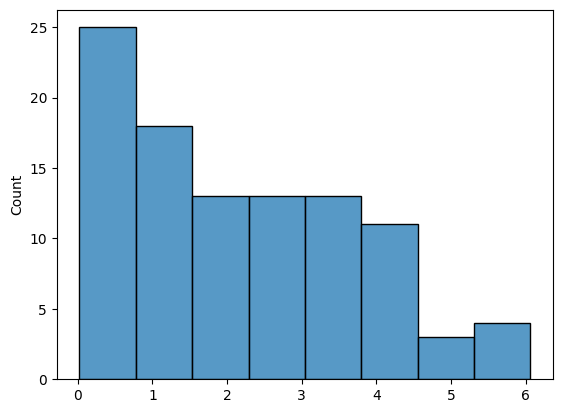

In [5]:
sns.histplot(y)

<Axes: >

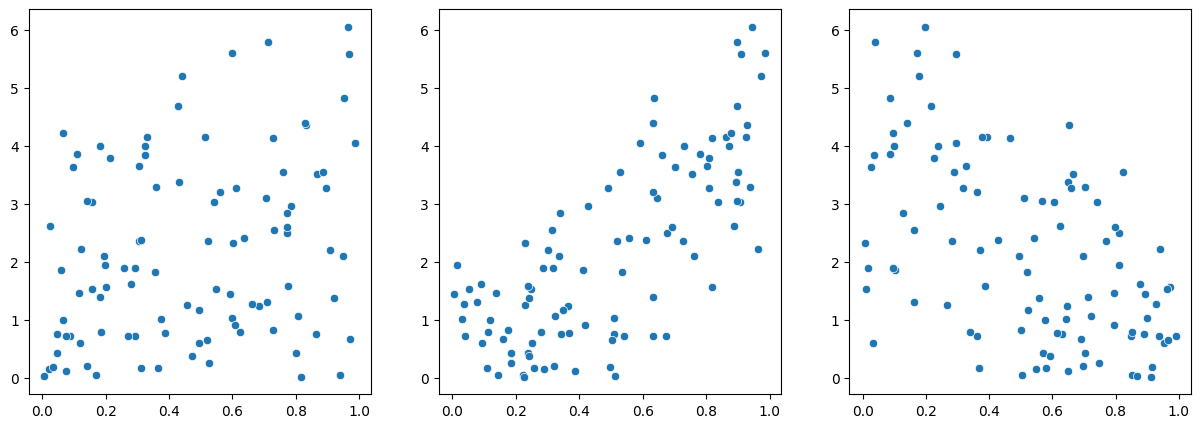

In [6]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.scatterplot(x=x1,y=y,ax=ax[0])
sns.scatterplot(x=x2,y=y,ax=ax[1])
sns.scatterplot(x=x3,y=y,ax=ax[2])

In [7]:
def y_cat(x):
  if x < 1:
    return 0
  elif x <=2:
    return 1
  elif x >= 5:
    return 3
  else:
    return 2

In [8]:
target = np.array([y_cat(x) for x in y]).reshape(-1,1)
target.shape

(100, 1)

In [9]:
n_values = np.max(target) + 1
y_true = np.squeeze(np.eye(n_values)[target])
y_true[:3]

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

In [31]:
def sigmoid(x):
  return 1/ (1 + np.exp(-x))

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

def der_sigmoid(a):
  return a * (1 - a)

In [11]:
INPUT_SIZE = X.shape[1]
HIDDEN_LAYER = (2,2)
OUTPUT_SIZE = target.shape[1]
NUM_LAYERS = len(HIDDEN_LAYER) + 1
print(INPUT_SIZE,HIDDEN_LAYER,OUTPUT_SIZE,NUM_LAYERS)

3 (2, 2) 1 3


In [12]:
# Forward propagation for single row
h0 = X[0]
h0

array([0.37454012, 0.03142919, 0.64203165])

In [13]:
# Weights initialisation
w1 = np.random.random((2,3))
w2 = np.random.random((2,2))
w3 = np.random.random((4,2))
b1 = np.random.random((2,1))
b2 = np.random.random((2,1))
b3 = np.random.random((4,1))
w1,b1,w2,b2,w3,b3

(array([[0.05168172, 0.53135463, 0.54063512],
        [0.6374299 , 0.72609133, 0.97585208]]),
 array([[0.15643704],
        [0.2502429 ]]),
 array([[0.51630035, 0.32295647],
        [0.79518619, 0.27083225]]),
 array([[0.54922666],
        [0.71459592]]),
 array([[0.43897142, 0.07845638],
        [0.02535074, 0.96264841],
        [0.83598012, 0.69597421],
        [0.40895294, 0.17329432]]),
 array([[0.66019738],
        [0.2799339 ],
        [0.95486528],
        [0.73789692]]))

In [14]:
a1 = np.dot(w1,h0.T).reshape(-1,1) + b1
a1

array([[0.53959882],
       [1.13833435]])

In [15]:
h1 = sigmoid(a1)
h1

array([[0.63171909],
       [0.75737369]])

In [16]:
a2 = np.dot(w2,h1).reshape(-1,1) + b2
a2

array([[1.11998219],
       [1.42205144]])

In [17]:
h2 = sigmoid(a2)
h2

array([[0.75398541],
       [0.80565982]])

In [18]:
a3 = np.dot(w3,h2).reshape(-1,1) + b3
a3

array([[1.05438458],
       [1.07461513],
       [2.14590055],
       [1.18585774]])

In [19]:
h3 = softmax(a3)
h3

array([[0.1628736 ],
       [0.16620218],
       [0.48516568],
       [0.18575853]])

In [20]:
h3.shape

(4, 1)

In [21]:
y_pred = h3
loss_function = -1 * np.log(np.dot(y_true[0],h3)) # cross entropy function that multiplies probability 1 of true class with pred probability of predicted class (Summ -> y_true[i] * log(y_pred[i]))
loss_function

array([1.79455026])

In [22]:
# Forward propagation
a1 = np.dot(w1,h0.T).reshape(-1,1) + b1
h1 = sigmoid(a1)
a2 = np.dot(w2,h1).reshape(-1,1) + b2
h2 = sigmoid(a2)
a3 = np.dot(w3,h2).reshape(-1,1) + b3
h3 = softmax(a3)
y_pred = h3
loss_function = -1 * np.log(np.dot(y_true[0],h3))

In [23]:
y_true[0], -1/h3

(array([0., 1., 0., 0.]),
 array([[-6.13973028],
        [-6.01676812],
        [-2.06115157],
        [-5.38333273]]))

In [24]:
# Back propagation
# Gradient with output layer
d_loss_ypred = np.dot(y_true[0], -1/h3) * y_true[0].reshape(-1,1) # vector with shape equal to output size
grad_loss_aL = -1 * (y_true[0].reshape(-1,1) - h3)
grad_loss_aL

array([[ 0.1628736 ],
       [-0.83379782],
       [ 0.48516568],
       [ 0.18575853]])

In [26]:
# same as Yhat - Y
h3 - y_true[0].reshape(-1,1)

array([[ 0.1628736 ],
       [-0.83379782],
       [ 0.48516568],
       [ 0.18575853]])

In [34]:
# compute grad of h2
grad_h2 = np.dot(w3.T,grad_loss_aL)
grad_h2

array([[ 0.53191482],
       [-0.42002198]])

In [36]:
# compute grad of a2
grad_a2 = grad_h2 * der_sigmoid(h2)
grad_a2

array([[ 0.09866563],
       [-0.06576371]])

In [39]:
grad_loss_aL, h2.T

(array([[ 0.1628736 ],
        [-0.83379782],
        [ 0.48516568],
        [ 0.18575853]]),
 array([[0.75398541, 0.80565982]]))

In [41]:
# compute grad of w3
grad_w3 = grad_loss_aL * h2.T
assert grad_w3.shape == w3.shape
grad_w3

array([[ 0.12280432,  0.13122072],
       [-0.62867139, -0.6717574 ],
       [ 0.36580784,  0.39087849],
       [ 0.14005923,  0.14965819]])

In [43]:
grad_b3 = grad_loss_aL
assert grad_b3.shape == b3.shape
grad_b3

array([[ 0.1628736 ],
       [-0.83379782],
       [ 0.48516568],
       [ 0.18575853]])

## Parameterize the NN

In [70]:
INPUT_SIZE = X.shape[1]
HIDDEN_LAYER = (3,3,3)
OUTPUT_SIZE = y_true.shape[1]
NUM_LAYERS = len(HIDDEN_LAYER) + 1
print(INPUT_SIZE,HIDDEN_LAYER,OUTPUT_SIZE,NUM_LAYERS)

3 (3, 3, 3) 4 4


In [71]:
w,b = {},{}
# Weights initialisation
for i in range(NUM_LAYERS):
  if i == 0:
    w_size = (HIDDEN_LAYER[i],INPUT_SIZE)
    b_size = (HIDDEN_LAYER[i],1)
  elif i == NUM_LAYERS - 1:
    w_size = (OUTPUT_SIZE,HIDDEN_LAYER[-1])
    b_size = (OUTPUT_SIZE,1)
  else:
    w_size = (HIDDEN_LAYER[i],HIDDEN_LAYER[i-1])
    b_size = (HIDDEN_LAYER[i],1)
  w[i+1] = np.random.random(w_size)
  b[i+1] = np.random.random(b_size)

In [72]:
w,b

({1: array([[0.2709427 , 0.20225418, 0.31382681],
         [0.24150063, 0.21491264, 0.42485084],
         [0.90783851, 0.50705965, 0.18792038]]),
  2: array([[0.82183095, 0.65951077, 0.79624145],
         [0.27194604, 0.69235892, 0.26406198],
         [0.93906848, 0.63637428, 0.3245118 ]]),
  3: array([[0.21871561, 0.59530327, 0.26463503],
         [0.66196894, 0.81493973, 0.77802524],
         [0.76085133, 0.18772241, 0.08838495]]),
  4: array([[0.03114909, 0.25957645, 0.0336764 ],
         [0.87918577, 0.24339668, 0.55733717],
         [0.03897932, 0.66684739, 0.32302735],
         [0.89791919, 0.88811819, 0.32529062]])},
 {1: array([[0.07697167],
         [0.69615615],
         [0.38279876]]),
  2: array([[0.26951186],
         [0.19092659],
         [0.69464096]]),
  3: array([[0.69894883],
         [0.36834721],
         [0.43234623]]),
  4: array([[0.9009609 ],
         [0.99615767],
         [0.82541566],
         [0.84487135]])})

In [73]:
a, h = {}, {}
# Forward propagation for single row
h[0] = X[0].T

for L in range(1,NUM_LAYERS+1):
  a[L] = np.dot(w[L],h[L-1]).reshape(-1,1) + b[L]
  if L != NUM_LAYERS:
    h[L] = sigmoid(a[L])
  else:
    h[L] = softmax(a[L])
    loss_function = -1 * np.log(np.dot(y_true[0],h[L]))

print(loss_function)

[1.13713797]


In [74]:
a, h

({1: array([[0.38629401],
         [1.06613003],
         [0.85940801]]),
  2: array([[1.80879488],
         [1.05337219],
         [1.95510824]]),
  3: array([[1.56006468],
         [2.22288793],
         [1.30268894]]),
  4: array([[1.18739289],
         [2.38052446],
         [1.71330612],
         [2.64398676]])},
 {0: array([0.37454012, 0.03142919, 0.64203165]),
  1: array([[0.59539024],
         [0.74386026],
         [0.70253696]]),
  2: array([[0.85921616],
         [0.74142193],
         [0.87600258]]),
  3: array([[0.82636263],
         [0.90228611],
         [0.78628718]]),
  4: array([[0.09726953],
         [0.32073567],
         [0.16458036],
         [0.41741445]])})

In [75]:
# Backpropagation
grad_h, grad_a, grad_w, grad_b = {},{},{},{}
grad_a[NUM_LAYERS] =  h3 - y_true[0].reshape(-1,1)

for L in range(NUM_LAYERS,0,-1):
  grad_w[L] = grad_a[L] * h[L-1].T
  grad_b[L] = grad_a[L]
  grad_h[L-1] = np.dot(w[L].T,grad_a[L])
  grad_a[L-1] = grad_h[L-1] * der_sigmoid(h[L-1])

In [76]:
grad_h, grad_a, grad_w, grad_b

({3: array([[-0.54228223],
         [ 0.32784153],
         [-0.24207423]]),
  2: array([[-0.02883453],
         [-0.03040176],
         [-0.00169838]]),
  1: array([[-0.00462477],
         [-0.00645313],
         [-0.00437619]]),
  0: array([[-0.00142904],
         [-0.0009533 ],
         [-0.00104386]])},
 {4: array([[ 0.1628736 ],
         [-0.83379782],
         [ 0.48516568],
         [ 0.18575853]]),
  3: array([[-0.07781068],
         [ 0.02890444],
         [-0.04067807]]),
  2: array([[-0.00348793],
         [-0.00582849],
         [-0.00018448]]),
  1: array([[-0.00111411],
         [-0.00122953],
         [-0.00091453]]),
  0: array([[-3.34766064e-04, -4.35018906e-05, -3.28431417e-04],
         [-2.23318944e-04, -2.90196567e-05, -2.19093167e-04],
         [-2.44535147e-04, -3.17766415e-05, -2.39907905e-04]])},
 {4: array([[ 0.13459266,  0.14695859,  0.12806543],
         [-0.68901936, -0.75232419, -0.65560453],
         [ 0.40092279,  0.43775825,  0.38147955],
         [ 0.1